<a href="https://colab.research.google.com/github/Avinash987/Deep_Learning/blob/master/Sign_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files
files.upload()

Saving X.npy to X.npy


In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets list

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
chicago/chicago-copa-cases                              Chicago COPA Cases                                  3MB  2019-04-05 00:00:32           1477  
himanshupoddar/zomato-bangalore-restaurants             Zomato Bangalore Restaurants                       88MB  2019-03-31 09:48:43           1895  
sfinspiredu/synchrotron-data-set                        Synchrotron Data Set                               10KB  2019-05-27 19:54:29            312  
crisparada/brazilian-cities                             Brazilian Cities                                  935KB  2019-05-24 20:49:21            959  
taniaj/australian-election-2019-tweets                  Australian Election 2019 Tweets             

In [0]:
!kaggle datasets download -d ardamavi/sign-language-digits-dataset
!ls

sign-language-digits-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
kaggle.json  sample_data  sign-language-digits-dataset.zip


In [0]:
!unzip -q /content/sign-language-digits-dataset.zip

replace Sign-language-digits-dataset.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [0]:
# linear algebra
import numpy as np

In [0]:
!ls

kaggle.json  sign-language-digits-dataset.zip  X.npy
sample_data  Sign-language-digits-dataset.zip  Y.npy


In [0]:
X = np.load('/content/X.npy')
y = np.load('/content/Y.npy')

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
print("X shape:",X.shape)
print("y shape:",y.shape)
random_choice=np.random.randint(X.shape[0])
print("y[{}]:{}".format(random_choice, y[random_choice]))

X shape: (2062, 64, 64)
y shape: (2062, 10)
y[780]:[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


The target variable y in the dataset is a one-hot vector, Therefore, the dimensions of the target variable are 2062X10.

One-hot encoding targets represnt the following values :



*   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] = 0
*   [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] = 1
*   [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] = 2
*   [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] = 3
*   [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] = 4
*   [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] = 5
*   [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] = 6
*   [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] = 7
*   [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] = 8
*   [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] = 9




#  Data Vizualization

In [0]:
y_new = list()
for target in y:
    y_new.append(np.argmax(target))
y_new = np.array(y_new)
print("X shape:",X.shape)
print("y_new shape:",y_new.shape)
print("y_new[{}]:{}".format(random_choice, y_new[random_choice]))

X shape: (2062, 64, 64)
y_new shape: (2062,)
y_new[780]:3


In [0]:
sample_per_class=np.unique(y_new, return_counts=True)
 
for sign, number_of_sample in zip(sample_per_class[0], sample_per_class[1]):
    print("{} sign has {} samples.".format(sign, number_of_sample))

0 sign has 204 samples.
1 sign has 205 samples.
2 sign has 206 samples.
3 sign has 207 samples.
4 sign has 206 samples.
5 sign has 208 samples.
6 sign has 207 samples.
7 sign has 206 samples.
8 sign has 206 samples.
9 sign has 207 samples.


(-0.5, 63.5, 63.5, -0.5)

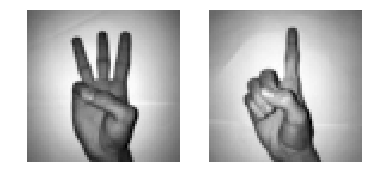

In [0]:
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(X[700].reshape(img_size, img_size), cmap= 'gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(X[900].reshape(img_size, img_size), cmap= 'gray')
plt.axis('off')

In [0]:
def show_image_classes(image, label, n=10):
    fig, axarr=plt.subplots(nrows=n, ncols=n, figsize=(18, 18))
    axarr=axarr.flatten()
    plt_id=0
    start_index=0
    for sign in range(10):
        sign_indexes=np.where(label==sign)[0]
        for i in range(n):

            image_index=sign_indexes[i]
            axarr[plt_id].imshow(image[image_index], cmap='gray')
            axarr[plt_id].set_xticks([])
            axarr[plt_id].set_yticks([])
            axarr[plt_id].set_title("Sign :{}".format(sign))
            plt_id=plt_id+1
    plt.suptitle("{} Sample for Each Classes".format(n))
    plt.show()

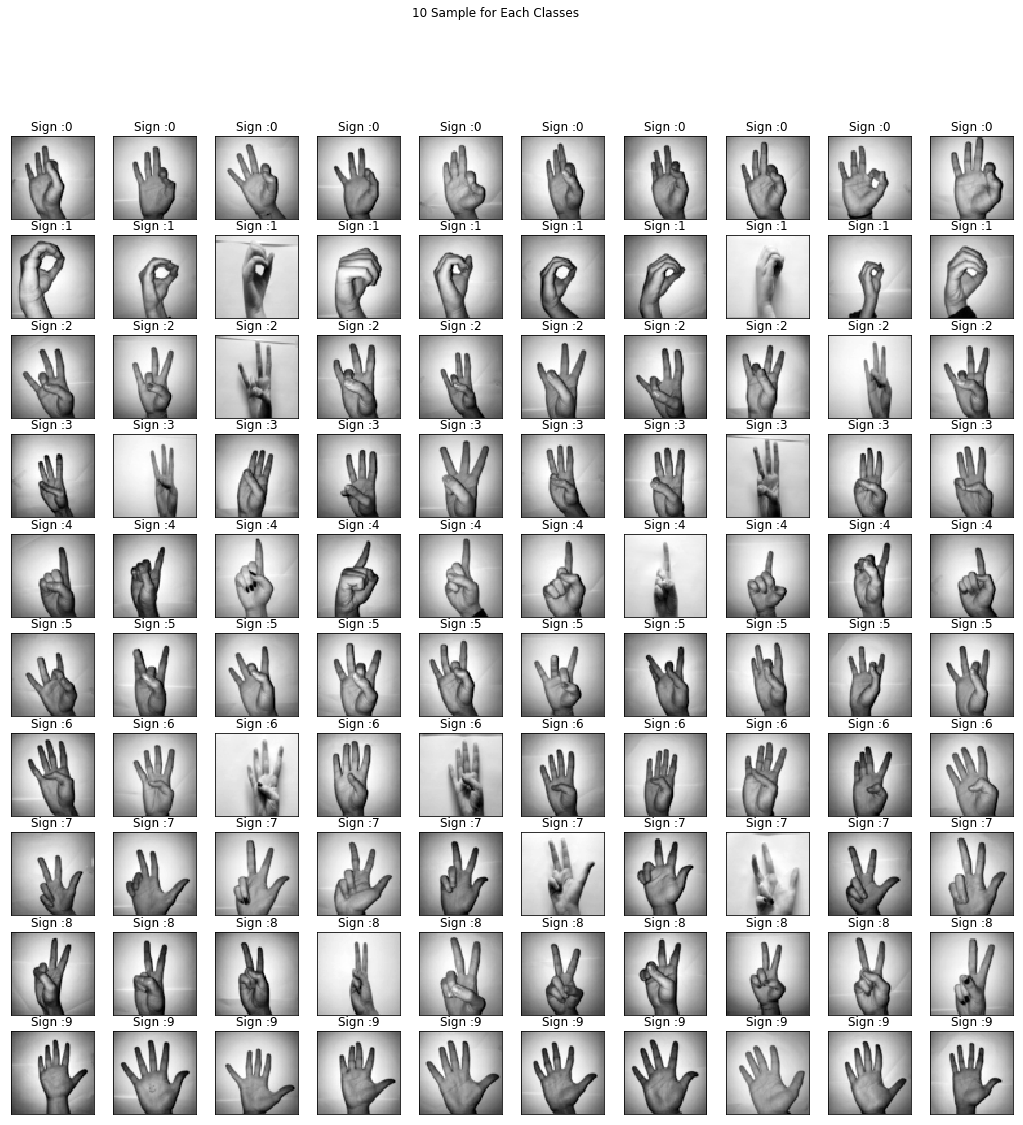

In [0]:
show_image_classes(image=X, label=y_new)

# Correcting Mistarget Matches
The graph above shows the images from 0 to 9 on each line from the top down. There is a mistake in the labeling of images. The above images do not match the order given in the dataset page. According to the dataset page, the sign of each line above will be as follows: 9, 0, 7, 6, 1, 8, 4, 3, 2, 5.

Let's do the right labeling in the order we've determined.

In [0]:
label_map={0:9,1:0, 2:7, 3:6, 4:1, 5:8, 6:4, 7:3, 8:2, 9:5}
y_temp=list()
for s in y_new:
    y_temp.append(label_map[s])
y_new = np.array(y_temp)

In [0]:
y_new.shape

(2062,)

In [0]:
y = np.zeros((2062,10))
for index in range(2062):
    y[index][y_new[index]] = 1


print("y shape:",y.shape)
print("y[{}]:{}".format(random_choice, y[random_choice]))

y shape: (2062, 10)
y[780]:[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


y[1000]:[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y_new[1000]:1


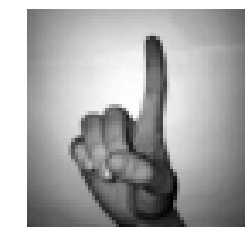

In [0]:
plt.imshow(X[1000].reshape(img_size, img_size), cmap= 'gray')
plt.axis('off')
print("y[{}]:{}".format( 1000, y[1000]))
print("y_new[{}]:{}".format( 1000, y_new[1000]))

#Visualizing After Correcting
The correct labeling will be as in the images in the chart below.

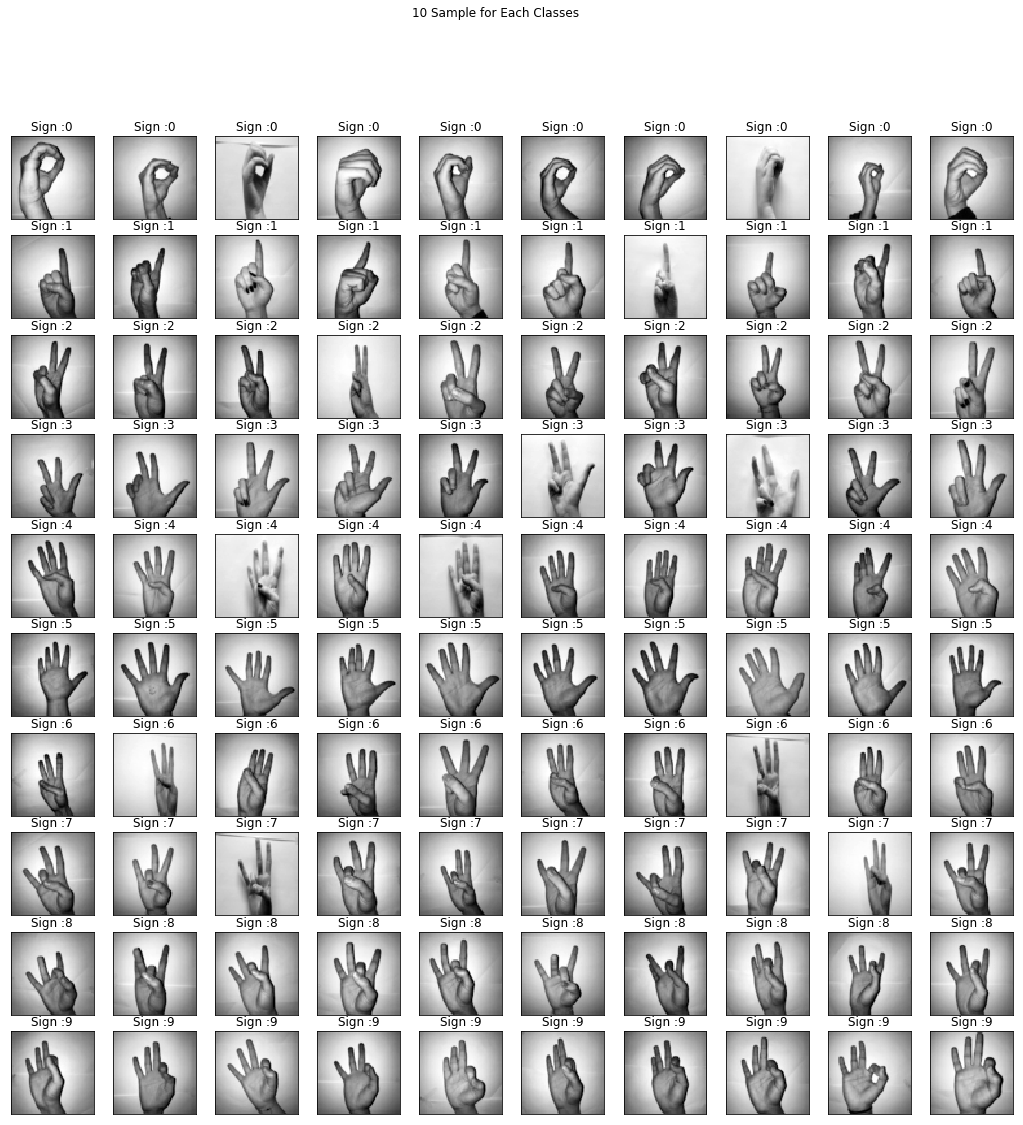

In [0]:
show_image_classes(image=X, label=y_new)

## Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

#reshape
X_train = X_train.reshape(-1,64,64,1)
X_test = X_test.reshape(-1,64,64,1)
#print x_train and y_train shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1443, 64, 64, 1)
(1443, 10)
(619, 64, 64, 1)
(619, 10)


# CNN In Keras

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential # to create a cnn model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [0]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

W0617 10:03:43.783307 140652885661568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0617 10:03:43.853138 140652885661568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 10:03:43.863237 140652885661568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 10:03:43.921309 140652885661568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0617 10:03:43.925586 140652885661568 deprecation_wrapp

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 8)         208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        4640      
__________

In [0]:
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [0]:
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

W0617 10:05:48.544379 140652885661568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0617 10:05:48.557932 140652885661568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

W0617 10:06:41.781311 140652885661568 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1443 samples, validate on 619 samples
Epoch 1/100
1443/1443 [==============================] - 5s 3ms/step - loss: 2.3088 - acc: 0.0942 - val_loss: 2.3033 - val_acc: 0.0872
Epoch 2/100
1443/1443 [==============================] - 3s 2ms/step - loss: 2.3032 - acc: 0.1067 - val_loss: 2.3037 - val_acc: 0.0872
Epoch 3/100
1443/1443 [==============================] - 4s 2ms/step - loss: 2.3003 - acc: 0.1254 - val_loss: 2.2958 - val_acc: 0.1939
Epoch 4/100
1443/1443 [==============================] - 4s 2ms/step - loss: 2.0755 - acc: 0.2557 - val_loss: 1.8600 - val_acc: 0.2811
Epoch 5/100
1443/1443 [==============================] - 4s 2ms/step - loss: 1.4429 - acc: 0.4782 - val_loss: 1.0828 - val_acc: 0.6656
Epoch 6/100
1443/1443 [==============================] - 4s 3ms/step - loss: 1.0181 - acc: 0.6653 - val_loss: 0.8508 - val_acc: 0.7415
Epoch 7/100
1443/1443 [==============================] - 4s 2ms/step - loss: 0.7807 - acc: 0.7235 - val_loss: 0.7256 - val_acc: 0.7674
Epoch 8/

## Evaluate the Model


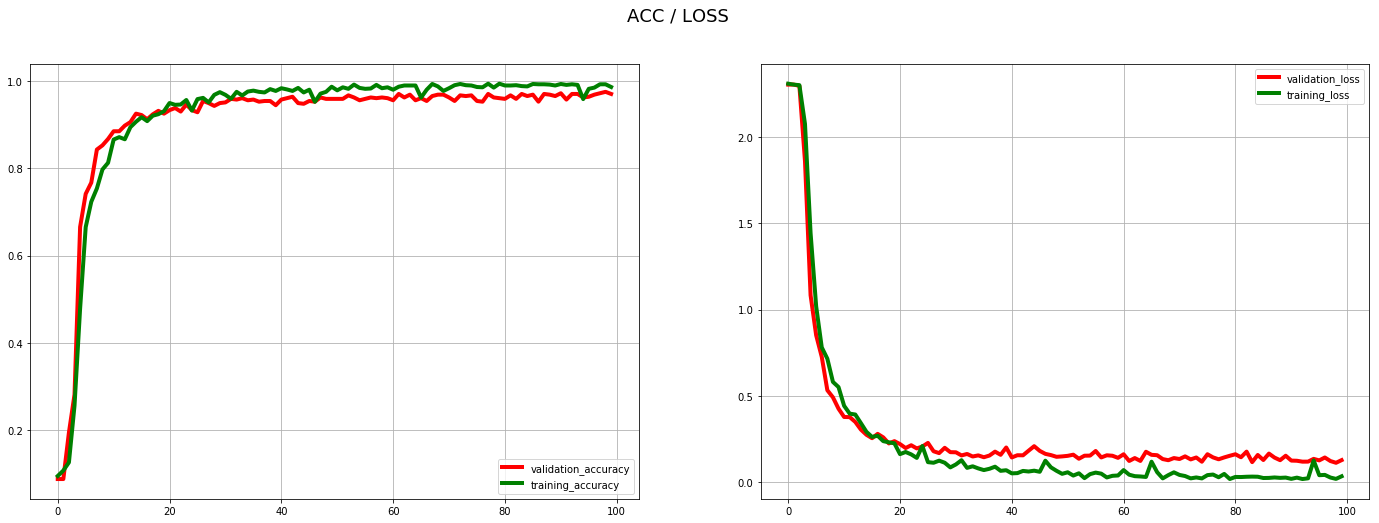

In [0]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history.history["val_acc"], label="validation_accuracy", c="red", linewidth=4)
plt.plot(history.history["acc"], label="training_accuracy", c="green", linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history["val_loss"], label="validation_loss", c="red", linewidth=4)
plt.plot(history.history["loss"], label="training_loss", c="green", linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

In [0]:
print('Train accuracy of the model: ',history.history['acc'][-1])

Train accuracy of the model:  0.9868329868329868


In [0]:
print('Train loss of the model: ',history.history['loss'][-1])

Train loss of the model:  0.03344405090051677


In [0]:
print('Validation accuracy of the model: ',history.history['val_acc'][-1])

Validation accuracy of the model:  0.9709208400646203


In [0]:
print('Validation loss of the model: ',history.history['val_loss'][-1])

Validation loss of the model:  0.12725326430311304


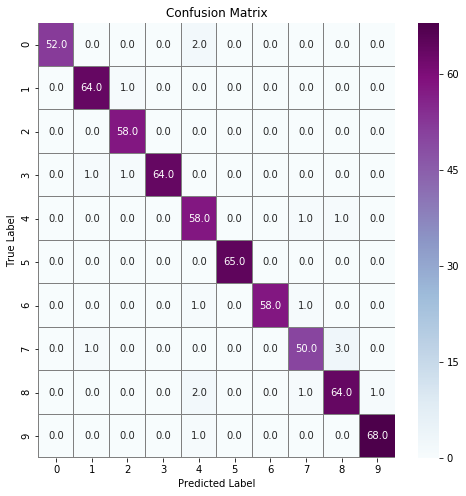

In [0]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()